<a href="https://colab.research.google.com/github/Jewelzufo/text-to-braille/blob/main/BrailleViz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter text to visualize in Braille: Jennifer 


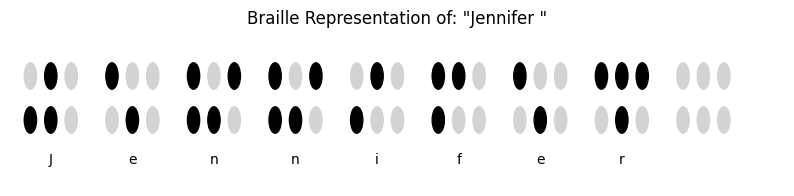

KeyboardInterrupt: Interrupted by user

In [ ]:
import matplotlib.pyplot as plt

# Define Braille patterns (using binary representation)
braille_patterns = {
    'a': 0b100000, 'b': 0b110000, 'c': 0b100100,
    'd': 0b100110, 'e': 0b100010, 'f': 0b110100,
    'g': 0b110110, 'h': 0b110010, 'i': 0b010100,
    'j': 0b010110, 'k': 0b101000, 'l': 0b111000,
    'm': 0b101100, 'n': 0b101110, 'o': 0b101010,
    'p': 0b111100, 'q': 0b111110, 'r': 0b111010,
    's': 0b011100, 't': 0b011110, 'u': 0b101001,
    'v': 0b111001, 'w': 0b010111, 'x': 0b101101,
    'y': 0b101111, 'z': 0b101011, ' ': 0b000000
}

def binary_to_braille_array(binary):
    """Convert a binary number to a Braille array."""
    return [int(b) for b in f'{binary:06b}']

def letter_to_braille(letter):
    """Convert a letter to its Braille representation (binary)."""
    return braille_patterns.get(letter.lower(), None)

def text_to_braille(text):
    """Convert a string of text to Braille binary representations."""
    return [letter_to_braille(letter) for letter in text.lower() if letter.isalpha() or letter.isspace()]

def visualize_braille_sequence(braille_sequence, original_text):
    """Visualizes a sequence of Braille characters."""
    fig, ax = plt.subplots(figsize=(10, 2))
    num_chars = len(braille_sequence)

    for idx, braille_binary in enumerate(braille_sequence):
        if braille_binary is not None:
            braille_array = binary_to_braille_array(braille_binary)
            for i, dot in enumerate(braille_array):
                row = i // 3
                col = i % 3
                color = 'black' if dot else 'lightgray'
                circle = plt.Circle((idx*4 + col, 1 - row), 0.3, color=color)
                ax.add_patch(circle)
            ax.text(idx*4 + 1, -1, original_text[idx], ha='center')

    ax.set_xlim(-1, num_chars*4 + 1)
    ax.set_ylim(-1.5, 2)
    ax.axis('off')
    ax.set_title(f'Braille Representation of: "{original_text}"')
    plt.show()

# Main loop to allow for multiple visualizations
while True:
    # Get text input from the user
    text = input("Enter text to visualize in Braille: ")
    braille_sequence = text_to_braille(text)
    visualize_braille_sequence(braille_sequence, text)

    # Ask the user if they want to continue
    choice = input("Would you like to visualize more text? (y/n): ")
    if choice.lower() != 'y':
        break